In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# function
def f(x):
    return x**2 + 1

In [3]:
f(2)

5

In [4]:
x_vals = np.arange(-5, 5, 0.25)
y_vals = f(x_vals)
y_vals

array([26.    , 23.5625, 21.25  , 19.0625, 17.    , 15.0625, 13.25  ,
       11.5625, 10.    ,  8.5625,  7.25  ,  6.0625,  5.    ,  4.0625,
        3.25  ,  2.5625,  2.    ,  1.5625,  1.25  ,  1.0625,  1.    ,
        1.0625,  1.25  ,  1.5625,  2.    ,  2.5625,  3.25  ,  4.0625,
        5.    ,  6.0625,  7.25  ,  8.5625, 10.    , 11.5625, 13.25  ,
       15.0625, 17.    , 19.0625, 21.25  , 23.5625])

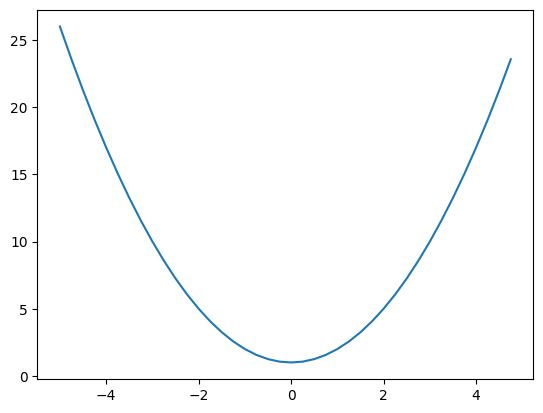

In [5]:
plt.plot(x_vals, y_vals)

### Understanding Derivatives

#### Basic Definition of Derivatives

A derivative measures how a function changes as its input changes. Essentially, it's the slope of the function at any given point.

#### Numerical Approximation

In the notebook, we see a simple way to approximate a derivative numerically:

```python
h = 0.000001
x = 2/3
(f(x + h) - f(x)) / h
```

This is known as the finite difference method. It calculates the slope of a tiny line segment on the function's curve.

#### Interpretation of Derivatives

1. **Rate of Change**: The derivative tells us how fast a function is changing at any point.
2. **Tangent Line**: Geometrically, the derivative gives the slope of the tangent line to the function's graph at a point.

#### Derivatives in Machine Learning

In the context of neural networks and machine learning:

1. **Gradients**: Derivatives generalize to gradients in multiple dimensions. Each weight in a neural network has a gradient that indicates how changing that weight would affect the output.

2. **Optimization**: During training, we use these gradients to adjust the weights in a direction that reduces the error (loss) of the network's predictions.


In [6]:
h = 0.000001
x = 0
derivative = (f(x + h) - f(x)) / h
derivative

1.000088900582341e-06

In [7]:
# multiple scalar.
def complex_function(a, b, c):
    return a*b + c

In [8]:
a, b, c = 2.0, -3.0, 10.0
h = 0.0001

In [9]:
d = complex_function(a, b, c)
d

4.0

In [10]:
# slope of this complex_function w.r.t a 
# d(f(x)) / da
(complex_function(a+h, b, c) - complex_function(a, b, c)) / h

-3.000000000010772

#### custom value structure

In [11]:
from data import Data
from draw_graph import draw_dot

In [12]:
a = Data(value = 2.0, label = 'a')
b = Data(value = -3.0, label = 'b')
c = Data(value = 10.0, label = 'c')

In [13]:
d = a*b; d.label='d'
e = d + c; e.label='e'

In [14]:
f = Data(value=-2.0, label='f')
L = e * f; L.label = 'L'

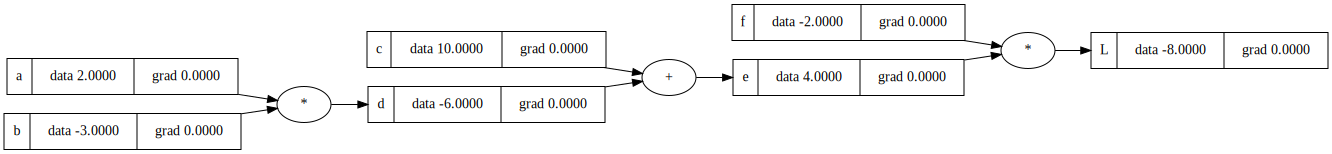

In [15]:
draw_dot(L)

#### manual back propagation

In [16]:
def _backward_pass(a, b, c, d, e, f, L):
    # dL/dL = 1
    L.grad = 1.0
    print(f"dL/dL = {L.grad}")

    # dL/de and dL/df
    e.grad = f.value * L.grad
    f.grad = e.value * L.grad
    print(f"dL/de = dL/dL * f = {L.grad} * {f.value} = {e.grad}")
    print(f"dL/df = dL/dL * e = {L.grad} * {e.value} = {f.grad}")

    # dL/dd and dL/dc
    d.grad = e.grad * 1  # de/dd = 1
    c.grad = e.grad * 1  # de/dc = 1
    print(f"dL/dd = dL/de * de/dd = {e.grad} * 1 = {d.grad}")
    print(f"dL/dc = dL/de * de/dc = {e.grad} * 1 = {c.grad}")

    # dL/da and dL/db
    a.grad = d.grad * b.value  # dd/da = b
    b.grad = d.grad * a.value  # dd/db = a
    print(f"dL/da = dL/dd * dd/da = {d.grad} * {b.value} = {a.grad}")
    print(f"dL/db = dL/dd * dd/db = {d.grad} * {a.value} = {b.grad}")

In [17]:
_backward_pass(a,b,c,d,e,f,L)

dL/dL = 1.0
dL/de = dL/dL * f = 1.0 * -2.0 = -2.0
dL/df = dL/dL * e = 1.0 * 4.0 = 4.0
dL/dd = dL/de * de/dd = -2.0 * 1 = -2.0
dL/dc = dL/de * de/dc = -2.0 * 1 = -2.0
dL/da = dL/dd * dd/da = -2.0 * -3.0 = 6.0
dL/db = dL/dd * dd/db = -2.0 * 2.0 = -4.0


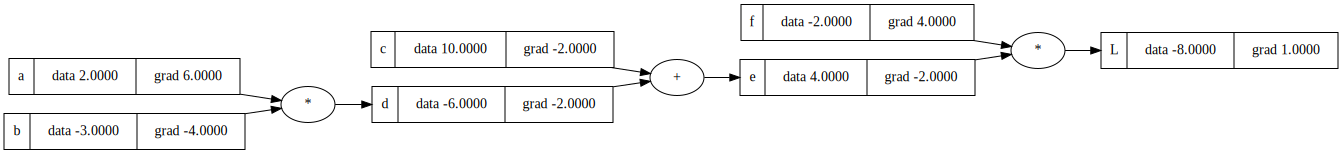

In [18]:
draw_dot(L)

In [19]:
def _forward_pass(a, b, c, f):
    d = a * b
    print(f"d = a * b = {a.value} * {b.value} = {d.value}")

    e = d + c
    print(f"e = d + c = {d.value} + {c.value} = {e.value}")
    
    L = e * f; L.label = 'L'
    print(f"L = e * f = {e.value} * {f.value} = {L.value}")

    return L

### Understanding Gradients.

Here's what gradients tell us:

#### 1. Direction of Steepest Increase

- A gradient is a vector that points in the direction of the steepest increase of a function.
- In machine learning, we often want to minimize a loss function, so we move in the opposite direction of the gradient.

#### 2. Sensitivity of the Output

- The gradient tells us how sensitive the output (usually the loss) is to small changes in each input (parameter).
- Larger gradient magnitudes indicate that the output is more sensitive to changes in that parameter.

#### 3. Required Parameter Updates

- In gradient descent, the gradient indicates how much we should update each parameter to reduce the loss.
- The magnitude of the gradient component for each parameter suggests the relative importance of that parameter in affecting the output.

#### 4. Learning Progress

- The overall magnitude of the gradient can indicate how close we are to a minimum:
  - Large gradients suggest we're far from a minimum.
  - Small gradients might indicate we're approaching a minimum (but be cautious of local minima!).

#### 5. Feature Importance

- In simpler models like linear regression, the magnitudes of the gradients can give insight into which features are most important for predicting the output.

#### 6. Troubleshooting

- Vanishing gradients (very small values) or exploding gradients (very large values) can indicate problems in network architecture or initialization.


In [20]:
# adjust weights based on gradients and step size
a.value += 0.01 * a.grad
b.value += 0.01 * b.grad
c.value += 0.01 * c.grad
f.value += 0.01 * f.grad

In [21]:
L1 = _forward_pass(a,b,c,f)
L1

d = a * b = 2.06 * -3.04 = -6.2624
e = d + c = -6.2624 + 9.98 = 3.7176
L = e * f = 3.7176 * -1.96 = -7.286496


Data(value=-7.286496)

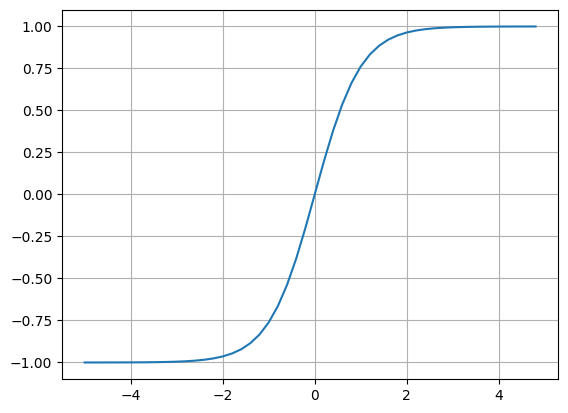

In [22]:
# tanh
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [23]:
# neuron
# inputs x1,x2
x1 = Data(2.0, label='x1')
x2 = Data(0.0, label='x2')
# weights w1,w2
w1 = Data(-3.0, label='w1')
w2 = Data(1.0, label='w2')
# bias of the neuron
b = Data(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

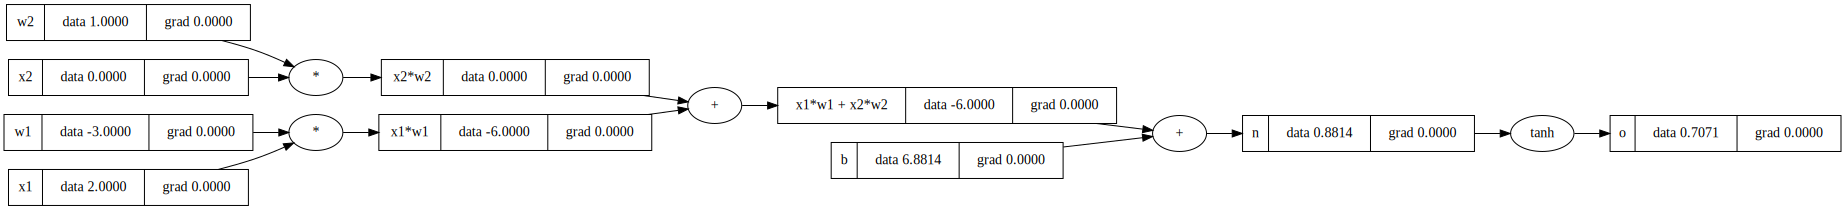

In [24]:
draw_dot(o)

In [25]:
# o = tanh(n)
# do/dn = 1 - o**2
1 - o.value**2
o.grad = 1.0
n.grad = 0.5
x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x2.grad = w2.value * x2w2.grad
w2.grad = x2.value * x2w2.grad
x1.grad = w1.value * x1w1.grad
w1.grad = x1.value * x1w1.grad

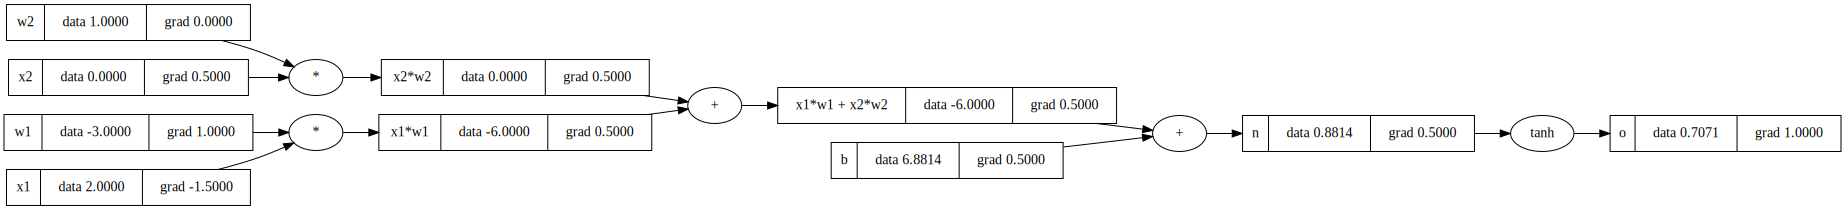

In [26]:
draw_dot(o)

In [27]:
# neuron
# inputs x1,x2
x1 = Data(2.0, label='x1')
x2 = Data(0.0, label='x2')
# weights w1,w2
w1 = Data(-3.0, label='w1')
w2 = Data(1.0, label='w2')
# bias of the neuron
b = Data(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

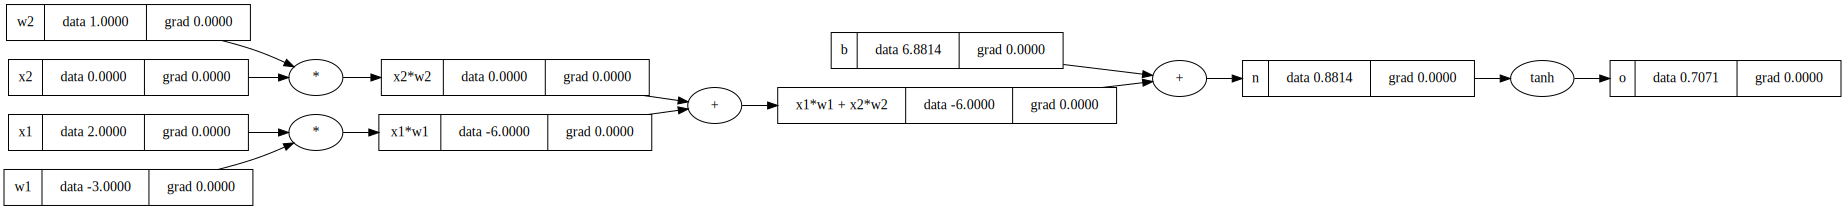

In [28]:
draw_dot(o)

In [29]:
# using _backward from Data class
o.grad = 1.0
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

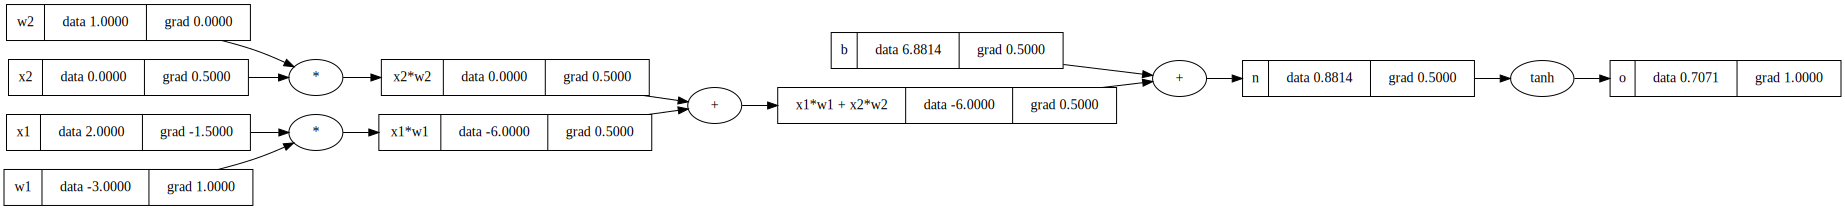

In [30]:
draw_dot(o)

In [31]:
# using backward method from Data class to fill the gradients from reversed topo of the nodes
o.grad = 1.0
o.backward()

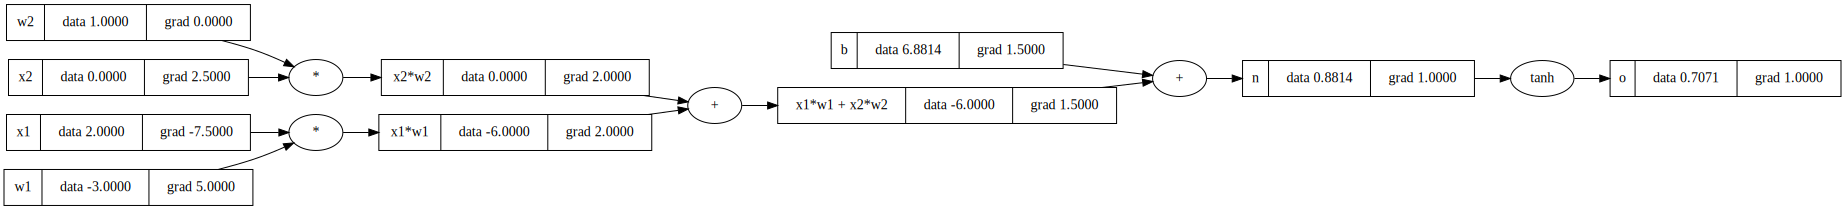

In [32]:
draw_dot(o)

#### multivariate case accumulate gradients

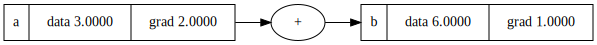

In [33]:
a = Data(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

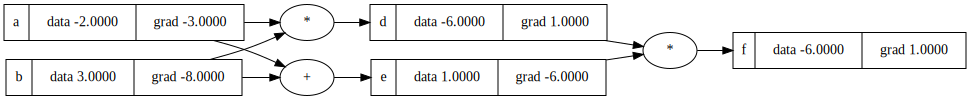

In [34]:
a = Data(-2.0, label='a')
b = Data(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

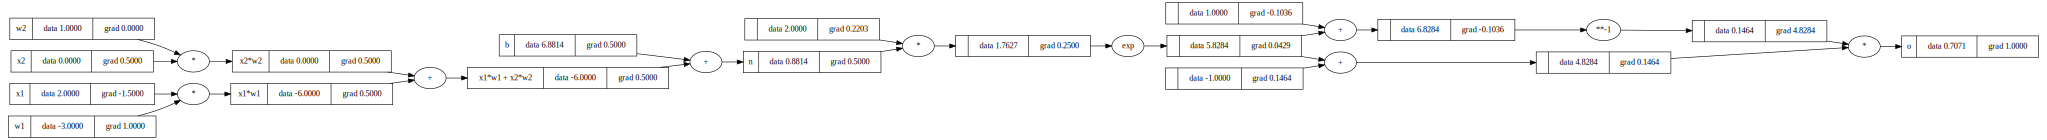

In [35]:
# inputs x1,x2
x1 = Data(2.0, label='x1')
x2 = Data(0.0, label='x2')
# weights w1,w2
w1 = Data(-3.0, label='w1')
w2 = Data(1.0, label='w2')
# bias of the neuron
b = Data(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [37]:
# verify with torch
import torch

In [38]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [43]:
import random

In [44]:
# backpropagation in MLP setting
class Neuron:
  
  def __init__(self, nin):
    self.w = [Data(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Data(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [45]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Data(value=-0.7224386887339705)

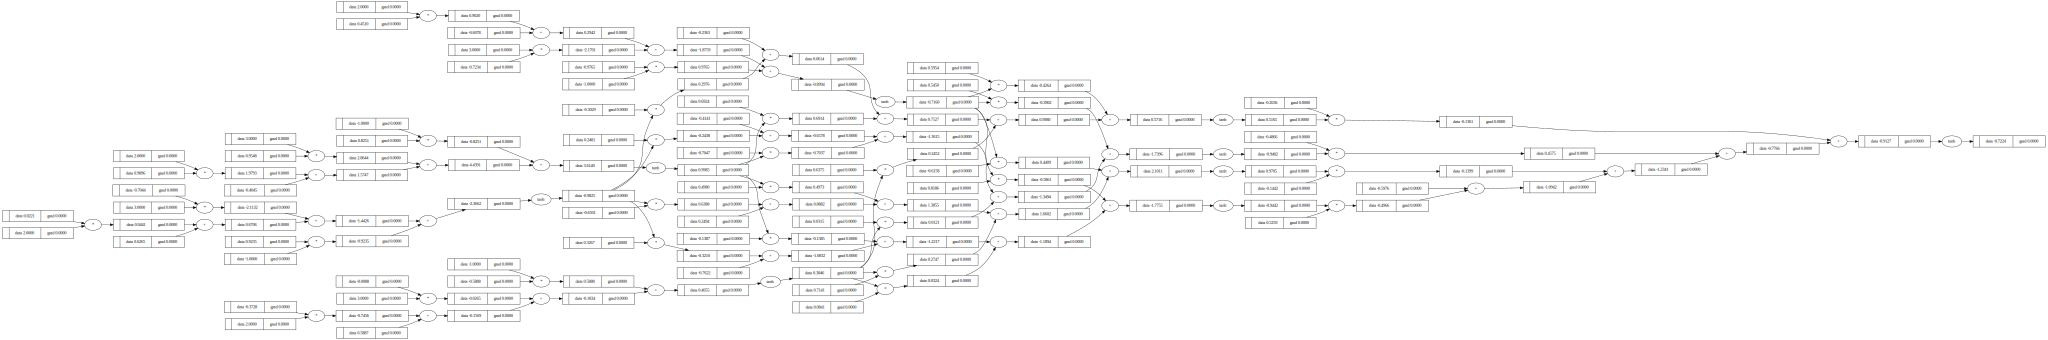

In [46]:
draw_dot(n(x))

In [47]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] 

In [50]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.value += -0.1 * p.grad
  
  print(k, loss.value)
  

0 3.241249058122582
1 2.236868579921429
2 1.3810066344209782
3 0.79330142854038
4 0.24293690818484232
5 0.08382205006214002
6 0.0660475062812567
7 0.054590972978490054
8 0.046444027045352464
9 0.040334933888409356
10 0.035585663750168826
11 0.031791860276802225
12 0.02869526686931463
13 0.026122733090749157
14 0.02395374675300815
15 0.022101857729877224
16 0.020503467716480633
17 0.019110774916204602
18 0.01788717779358824
19 0.016804192239590083


In [51]:
ypred

[Data(value=0.9290029375075562),
 Data(value=-0.9637006386880523),
 Data(value=-0.9243036128772927),
 Data(value=0.931326695856774)]